In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/houses.csv')

current_year = pd.Timestamp.now().year
df['Years_Since_Built'] = current_year - df['Year_Built']

scaler = MinMaxScaler()
df['Square_Footage_Normalized'] = scaler.fit_transform(df[['Square_Footage']])

display(df[['Year_Built', 'Years_Since_Built', 'Square_Footage', 'Square_Footage_Normalized']].head())

,Year_Built,Years_Since_Built,Square_Footage,Square_Footage_Normalized
0,1981,44,1360,0.190614
1,2016,9,4272,0.838301
2,2016,9,3592,0.687055
3,1977,48,966,0.102980
4,1993,32,4926,0.983763


In [ ]:

 X = df.drop(columns=['House_Price','Unnamed: 0','Square_Footage','Year_Built'], axis=1)
 y = df['House_Price']

 display("Features (X):")
 display(X.head())
 display("Target Variable (y):")
 display(y.head())

'Features (X):'

,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,Years_Since_Built,Square_Footage_Normalized
0,2,1,0.599637,0,5,44,0.190614
1,3,3,4.753014,1,6,9,0.838301
2,1,2,3.634823,0,9,9,0.687055
3,1,2,2.730667,1,8,48,0.102980
4,2,1,4.699073,0,8,32,0.983763


'Target Variable (y):'

,House_Price
0,2.623829e+05
1,9.852609e+05
2,7.779774e+05
3,2.296989e+05
4,1.041741e+06


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (800, 7)
Shape of X_test: (200, 7)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


sgd_reg = SGDRegressor(
    eta0=0.0001,
    learning_rate='constant',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
sgd_reg.fit(X_train, y_train)

print("Linear Regression model trained successfully.")
print("SGD Regressor model trained successfully.")


Linear Regression model trained successfully.
SGD Regressor model trained successfully.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

linear_reg_predictions = linear_reg.predict(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)

sgd_reg_predictions = sgd_reg.predict(X_test_scaled)


print("Linear Regression Predictions (first 5):")
print(linear_reg_predictions[:5])

print("\nSGD Regressor Predictions (first 5):")
print(sgd_reg_predictions[:5])


Linear Regression Predictions (first 5):
[ 868687.10747904  490337.89825447  945667.12422538 1033402.87599249
  776698.77390588]

SGD Regressor Predictions (first 5):
[ 868606.82473284  490302.03011793  945600.29677529 1033346.43292947
  776632.74930873]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)


sgd_reg_mse = mean_squared_error(y_test, sgd_reg_predictions)
sgd_reg_r2 = r2_score(y_test, sgd_reg_predictions)

print("Linear Regression Performance:")
print(f"  Mean Squared Error (MSE): {linear_reg_mse:.2f}")
print(f"  R-squared (R2): {linear_reg_r2:.4f}")

print("\nSGD Regressor Performance:")
print(f"  Mean Squared Error (MSE): {sgd_reg_mse:.2f}")
print(f"  R-squared (R2): {sgd_reg_r2:.4f}")


Linear Regression Performance:
  Mean Squared Error (MSE): 101434798.51
  R-squared (R2): 0.9984

SGD Regressor Performance:
  Mean Squared Error (MSE): 101508326.93
  R-squared (R2): 0.9984


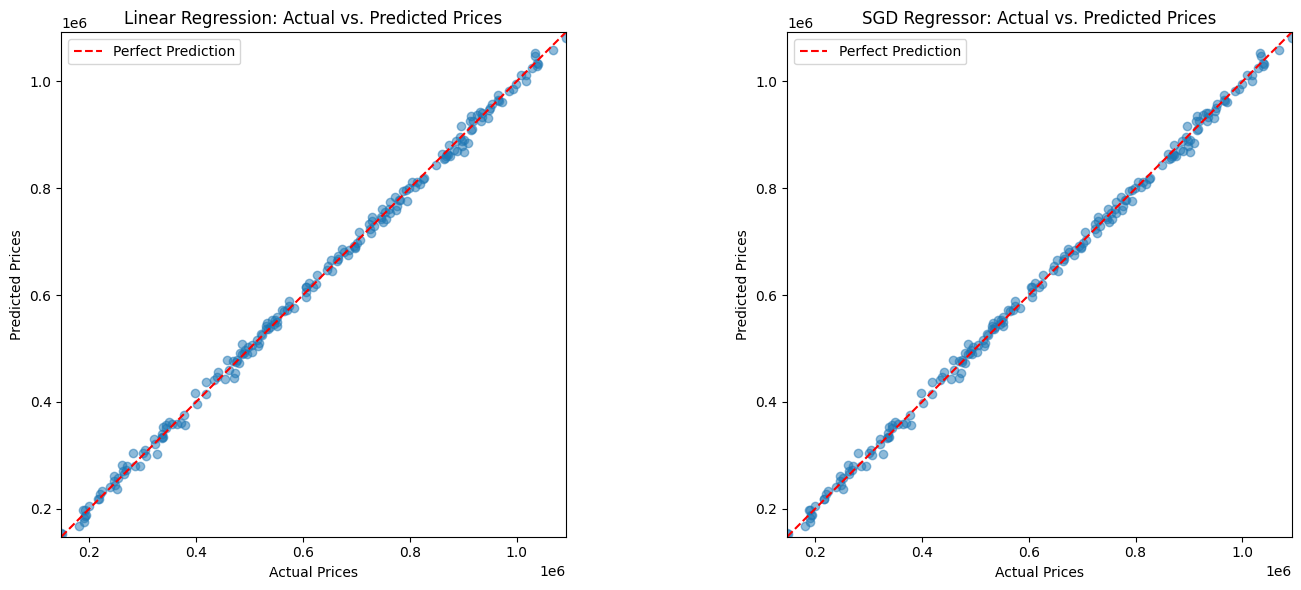

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

all_prices = np.concatenate([y_test, linear_reg_predictions, sgd_reg_predictions])
min_price = all_prices.min()
max_price = all_prices.max()


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(y_test, linear_reg_predictions, alpha=0.5)
axes[0].plot([min_price, max_price], [min_price, max_price], 'r--', label='Perfect Prediction')
axes[0].set_title('Linear Regression: Actual vs. Predicted Prices')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].legend()
axes[0].set_xlim([min_price, max_price])
axes[0].set_ylim([min_price, max_price])
axes[0].set_aspect('equal', adjustable='box')


axes[1].scatter(y_test, sgd_reg_predictions, alpha=0.5)
axes[1].plot([min_price, max_price], [min_price, max_price], 'r--', label='Perfect Prediction')
axes[1].set_title('SGD Regressor: Actual vs. Predicted Prices')
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].legend()
axes[1].set_xlim([min_price, max_price])
axes[1].set_ylim([min_price, max_price])
axes[1].set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()
